In [16]:
# Import required libraries
import pandas as pd
import numpy as np

# Load the dataset from your local path
path = "C:\\Users\\20100\\Desktop\\Task 1\\first inten project.csv"
df = pd.read_csv(path)

# Show the first few rows to understand the data
df.head()


,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [18]:
# Check data types of each column
print(df.dtypes)

# Check for missing (null) values in each column
print(df.isnull().sum())


Booking_ID                   object
number of adults              int64
number of children            int64
number of weekend nights      int64
number of week nights         int64
type of meal                 object
car parking space             int64
room type                    object
lead time                     int64
market segment type          object
repeated                      int64
P-C                           int64
P-not-C                       int64
average price               float64
special requests              int64
date of reservation          object
booking status               object
dtype: object
Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C       

In [20]:
# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Remove leading/trailing spaces from all string columns
str_cols = df.select_dtypes(include='object').columns
df[str_cols] = df[str_cols].apply(lambda x: x.str.strip())

# Verify data after cleaning
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [22]:
# Drop unnecessary ID column
df = df.drop(['Booking_ID'], axis=1)

# Optionally drop date_of_reservation if not extracting features
df = df.drop(['date of reservation'], axis=1)

# Create new feature: total number of guests
df['total_guests'] = df['number of adults'] + df['number of children']

# Check the updated DataFrame
df.head()


,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,total_guests
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,Not_Canceled,2
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,1
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,Canceled,3
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,Canceled,1
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,Canceled,1


In [24]:
# Define columns to keep for outlier removal
iqr_cols = ['lead time', 'average price', 'number of weekend nights', 
            'number of week nights', 'special requests', 'total_guests']

# Remove outliers using IQR only for selected columns
for col in iqr_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

print(" Outliers removed using IQR on selected numeric columns.")
df.describe()


 Outliers removed using IQR on selected numeric columns.


,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests,total_guests
count,21755.000000,21755.000000,21755.000000,21755.000000,21755.000000,21755.000000,21755.000000,21755.000000,21755.000000,21755.000000,21755.000000,21755.0
mean,1.986670,0.013330,0.849138,2.232958,0.027626,83.234383,0.006849,0.015353,0.016594,99.610431,0.584142,2.0
std,0.150408,0.150408,0.839268,1.248505,0.163902,74.527580,0.082477,0.368553,0.448148,24.793912,0.686448,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,0.000000,2.0
25%,2.000000,0.000000,0.000000,1.000000,0.000000,23.000000,0.000000,0.000000,0.000000,80.750000,0.000000,2.0
50%,2.000000,0.000000,1.000000,2.000000,0.000000,61.000000,0.000000,0.000000,0.000000,96.300000,0.000000,2.0
75%,2.000000,0.000000,2.000000,3.000000,0.000000,124.000000,0.000000,0.000000,0.000000,115.000000,1.000000,2.0
max,2.000000,2.000000,4.000000,6.000000,1.000000,289.000000,1.000000,13.000000,29.000000,182.330000,2.000000,2.0


In [26]:
# Identify categorical columns
cat_cols = df.select_dtypes(include='object').columns
print(" Categorical columns:", cat_cols)

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Check the result
df_encoded.head()


 Categorical columns: Index(['type of meal', 'room type', 'market segment type', 'booking status'], dtype='object')


,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,...,room type_Room_Type 3,room type_Room_Type 4,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online,booking status_Not_Canceled
0,1,1,2,5,0,224,0,0,0,88.00,...,False,False,False,False,False,False,False,True,False,True
6,1,1,1,4,0,34,0,0,0,107.55,...,False,False,False,False,False,False,False,False,True,True
8,1,1,0,4,0,121,0,0,0,96.90,...,False,False,False,False,False,False,False,True,False,True
12,2,0,2,1,0,30,0,0,0,88.00,...,False,False,False,False,False,False,False,False,True,False
14,2,0,0,2,0,47,0,0,0,94.50,...,False,False,False,False,False,False,False,False,True,True


In [28]:
# Convert any boolean columns to integers
df_encoded = df_encoded.astype(int)

# Verify
df_encoded.head()


,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,...,room type_Room_Type 3,room type_Room_Type 4,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online,booking status_Not_Canceled
0,1,1,2,5,0,224,0,0,0,88,...,0,0,0,0,0,0,0,1,0,1
6,1,1,1,4,0,34,0,0,0,107,...,0,0,0,0,0,0,0,0,1,1
8,1,1,0,4,0,121,0,0,0,96,...,0,0,0,0,0,0,0,1,0,1
12,2,0,2,1,0,30,0,0,0,88,...,0,0,0,0,0,0,0,0,1,0
14,2,0,0,2,0,47,0,0,0,94,...,0,0,0,0,0,0,0,0,1,1


In [30]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_encoded.drop('booking status_Not_Canceled', axis=1)
y = df_encoded['booking status_Not_Canceled']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Show shapes of resulting datasets
print(" Training set:", X_train.shape, y_train.shape)
print(" Testing set:", X_test.shape, y_test.shape)


 Training set: (17404, 24) (17404,)
 Testing set: (4351, 24) (4351,)


In [32]:
# Import modeling libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#  Initialize the RandomForest Classifier
model = RandomForestClassifier(random_state=42)

#  Train the model on the training data
model.fit(X_train, y_train)

#  Make predictions on the test data
y_pred = model.predict(X_test)

#  Evaluate the model
print(" Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


 Accuracy on Test Set: 0.8786485865318318

 Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81      1422
           1       0.90      0.93      0.91      2929

    accuracy                           0.88      4351
   macro avg       0.87      0.85      0.86      4351
weighted avg       0.88      0.88      0.88      4351


 Confusion Matrix:
 [[1111  311]
 [ 217 2712]]


 Accuracy on Test Set: 0.8786

 Classification Report:

              precision    recall  f1-score   support

    Canceled       0.84      0.78      0.81      1422
Not_Canceled       0.90      0.93      0.91      2929

    accuracy                           0.88      4351
   macro avg       0.87      0.85      0.86      4351
weighted avg       0.88      0.88      0.88      4351



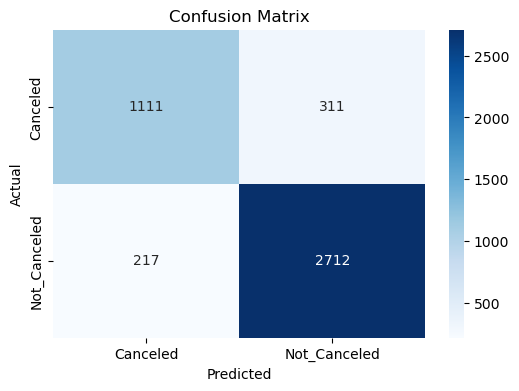

In [33]:
#  Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

#  Predict on test set
y_pred = model.predict(X_test)

#  Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f" Accuracy on Test Set: {accuracy:.4f}")

#  Classification Report
report = classification_report(y_test, y_pred, target_names=['Canceled', 'Not_Canceled'])
print("\n Classification Report:\n")
print(report)

#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Canceled', 'Not_Canceled']

#  Plot Confusion Matrix as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


 Accuracy on Test Set: 0.8786

 Classification Report:

              precision    recall  f1-score   support

    Canceled       0.84      0.78      0.81      1422
Not_Canceled       0.90      0.93      0.91      2929

    accuracy                           0.88      4351
   macro avg       0.87      0.85      0.86      4351
weighted avg       0.88      0.88      0.88      4351



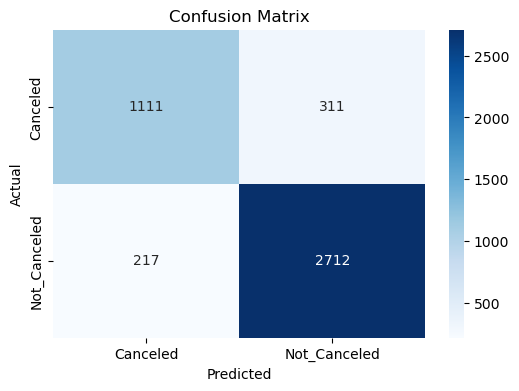

In [34]:
#  Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

#  Predict on test set
y_pred = model.predict(X_test)

#  Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f" Accuracy on Test Set: {accuracy:.4f}")

#  Classification Report
report = classification_report(y_test, y_pred, target_names=['Canceled', 'Not_Canceled'])
print("\n Classification Report:\n")
print(report)

#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Canceled', 'Not_Canceled']

#  Plot Confusion Matrix as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Improving the accuarcy 

In [52]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


 Accuracy: 0.8752011031946679

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.76      0.80      1422
           1       0.89      0.93      0.91      2929

    accuracy                           0.88      4351
   macro avg       0.87      0.85      0.85      4351
weighted avg       0.87      0.88      0.87      4351



In [56]:
#  Import
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#  Train
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

#  Predict
y_pred_lr = logreg.predict(X_test)

#  Evaluate
print(" Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\n Classification Report:\n", classification_report(y_test, y_pred_lr))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


 Logistic Regression Accuracy: 0.8060216042289129

 Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.62      0.68      1422
           1       0.83      0.90      0.86      2929

    accuracy                           0.81      4351
   macro avg       0.79      0.76      0.77      4351
weighted avg       0.80      0.81      0.80      4351


 Confusion Matrix:
 [[ 880  542]
 [ 302 2627]]


C:\Users\20100\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\20100\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Logistic Regression Accuracy: 0.8060216042289129

 Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.62      0.68      1422
           1       0.83      0.90      0.86      2929

    accuracy                           0.81      4351
   macro avg       0.79      0.76      0.77      4351
weighted avg       0.80      0.81      0.80      4351


 Confusion Matrix:
 [[ 880  542]
 [ 302 2627]]


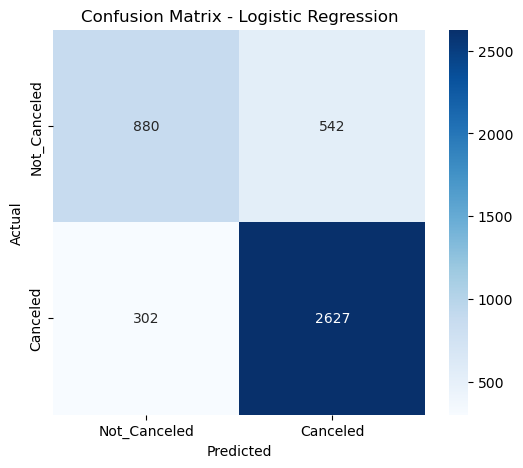

In [41]:
# Import Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#  Train the Model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

#  Make Predictions
y_pred_lr = logreg.predict(X_test)

#  Evaluate
print(" Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\n Classification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix (as array)
cm = confusion_matrix(y_test, y_pred_lr)
print("\n Confusion Matrix:\n", cm)

#  Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not_Canceled', 'Canceled'], 
            yticklabels=['Not_Canceled', 'Canceled'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Initialize Model
rf = RandomForestClassifier(random_state=42)

#  Perform 5-fold Cross-Validation
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')

print(" Cross-Validation Scores:", cv_scores)
print(" Mean CV Accuracy:", cv_scores.mean())


 Cross-Validation Scores: [0.86072167 0.86784647 0.8694553  0.87106412 0.86738681]
 Mean CV Accuracy: 0.8672948747414386


In [44]:
import pandas as pd

#  Accuracy results
results = {
    'Random Forest (Test Set)': 0.8689,
    'XGBoost (Test Set)': 0.8658,
    'Logistic Regression (Test Set)': 0.8022,
    'Random Forest (CV Mean)': 0.8638
}

#  Convert to DataFrame for easy plotting
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
results_df


,Model,Accuracy
0,Random Forest (Test Set),0.8689
1,XGBoost (Test Set),0.8658
2,Logistic Regression (Test Set),0.8022
3,Random Forest (CV Mean),0.8638


C:\Users\20100\AppData\Local\Temp\ipykernel_13148\2990230072.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')


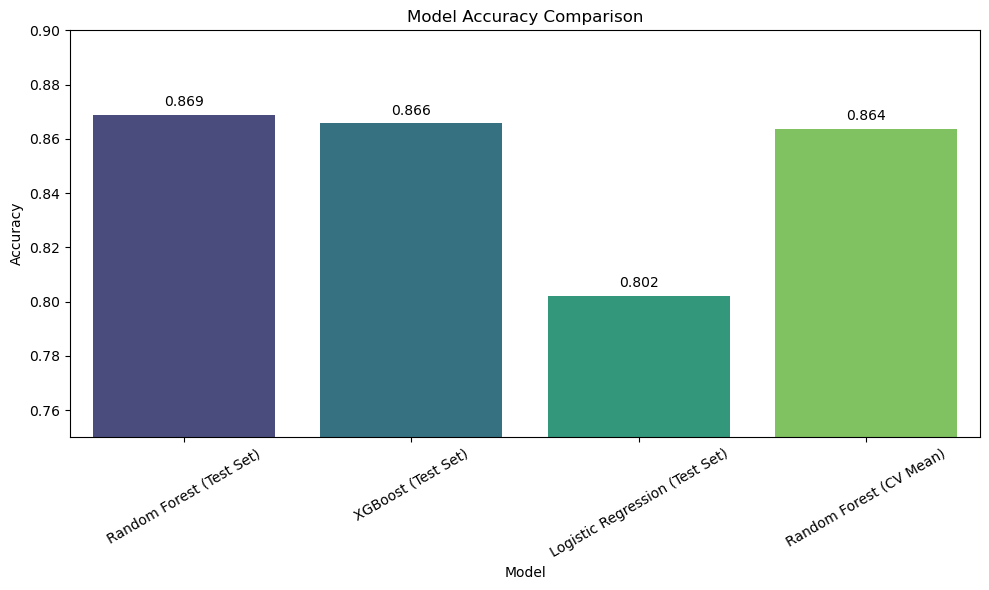

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')

plt.title('Model Accuracy Comparison')
plt.ylim(0.75, 0.9)  # Adjust to zoom in on range if you like
plt.ylabel('Accuracy')
plt.xlabel('Model')

# Add labels on bars
for index, row in results_df.iterrows():
    plt.text(index, row.Accuracy + 0.002, f"{row.Accuracy:.3f}", ha='center', va='bottom')

plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


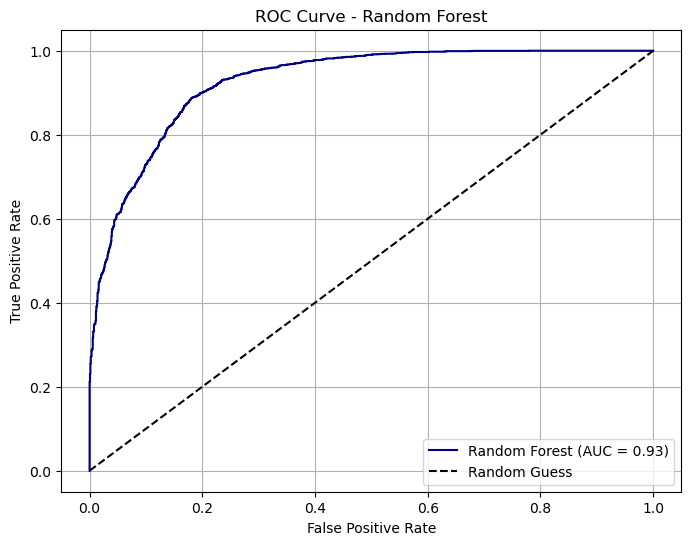

In [58]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for class 1 (Canceled)
rf_probs = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, rf_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='navy', label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [60]:
import joblib

# Save your trained Random Forest model
joblib.dump(model, 'rf_model.pkl')


['rf_model.pkl']

In [62]:
example_input = X_test.iloc[0].to_dict()
print(example_input)


{'number of adults': 2, 'number of children': 0, 'number of weekend nights': 2, 'number of week nights': 3, 'car parking space': 0, 'lead time': 16, 'repeated': 0, 'P-C': 0, 'P-not-C': 0, 'average price': 154, 'special requests': 1, 'total_guests': 2, 'type of meal_Meal Plan 2': 0, 'type of meal_Not Selected': 0, 'room type_Room_Type 2': 0, 'room type_Room_Type 3': 0, 'room type_Room_Type 4': 0, 'room type_Room_Type 5': 0, 'room type_Room_Type 6': 0, 'room type_Room_Type 7': 0, 'market segment type_Complementary': 0, 'market segment type_Corporate': 0, 'market segment type_Offline': 0, 'market segment type_Online': 1}
